 **Assignment 4 Submission**
 
Group Members : Divya Sasidharan, Poornima Venkatesha, Sinchana Eshwarappa Prameela

In [0]:
%tensorflow_version 2.x

In [0]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=9e9d5e1b42c6e8ee0687c3d68bcac357e260bee13614b1662863256cc2619b06
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [0]:
import tensorflow as tf

time: 1.21 s


#MLP Keras implementation --without tf.function

Execution time: 23.1 seconds

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 784]).astype('float32') / 255, train_labels.astype('int32')))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

train_steps = 2000

layer_list = [tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(10)]  
model = tf.keras.Sequential(layer_list) 

opt = tf.optimizers.Adam()#Stochastic gradient descent and momentum optimizer.
train_acc_metric = tf.metrics.SparseCategoricalAccuracy()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)#Computes the crossentropy loss between the labels and predictions.


for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        xent = loss_fn(lbl_batch, logits)

    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    if not step % 100:
        train_acc_metric(lbl_batch, logits)
        acc = train_acc_metric.result()
        print("Loss: {} Accuracy: {}".format(xent, acc))
        train_acc_metric.reset_states()

11493376/11490434 [==============================] - 0s 0us/step
Loss: 2.3020057678222656 Accuracy: 0.078125
Loss: 0.22198331356048584 Accuracy: 0.9296875
Loss: 0.34354743361473083 Accuracy: 0.890625
Loss: 0.20384442806243896 Accuracy: 0.921875
Loss: 0.11544245481491089 Accuracy: 0.96875
Loss: 0.1321561187505722 Accuracy: 0.9609375
Loss: 0.12043360620737076 Accuracy: 0.953125
Loss: 0.10690117627382278 Accuracy: 0.953125
Loss: 0.07768826931715012 Accuracy: 0.96875
Loss: 0.09210118651390076 Accuracy: 0.9609375
Loss: 0.07668447494506836 Accuracy: 0.9765625
Loss: 0.032480768859386444 Accuracy: 0.984375
Loss: 0.06165945902466774 Accuracy: 0.984375
Loss: 0.07296613603830338 Accuracy: 0.96875
Loss: 0.10044337064027786 Accuracy: 0.984375
Loss: 0.02629336714744568 Accuracy: 0.9921875
Loss: 0.022459598258137703 Accuracy: 0.984375
Loss: 0.05270273983478546 Accuracy: 0.9765625
Loss: 0.06267532706260681 Accuracy: 0.96875
Loss: 0.009721815586090088 Accuracy: 1.0
Loss: 0.0960521325469017 Accuracy: 0.

# MLP Keras implementation --decorating with @tf.function

Execution time: 7.46 seconds

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 784]).astype('float32') / 255, train_labels.astype('int32')))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

layer_list = [tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(10)]  
model = tf.keras.Sequential(layer_list) 

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = tf.keras.optimizers.Adam()
train_acc_metric = tf.metrics.SparseCategoricalAccuracy()
train_steps = 2000

#start of training
@tf.function
def training(img_batch,lbl_batch):
  with tf.GradientTape() as tape:
    logits = model(img_batch)
    xent = loss_fn(lbl_batch, logits)

  varis = model.trainable_variables
  grads = tape.gradient(xent, varis)
            
  opt.apply_gradients(zip(grads, varis))
        
  return xent, logits

for step, (images, labels)  in enumerate(data):
    if step > train_steps:
        break
    loss,acc = training(images, labels)
    train_acc_metric(labels, acc)
    acc = train_acc_metric.result()
        
    if not step % 100:
      print("Loss: {} Accuracy: {}".format(loss, acc))
      train_acc_metric.reset_states()

Loss: 2.367824077606201 Accuracy: 0.1015625
Loss: 0.342083603143692 Accuracy: 0.8536718487739563
Loss: 0.18917670845985413 Accuracy: 0.9313281178474426
Loss: 0.23715192079544067 Accuracy: 0.9422656297683716
Loss: 0.16928935050964355 Accuracy: 0.9537500143051147
Loss: 0.10563264787197113 Accuracy: 0.960839569568634
Loss: 0.12065829336643219 Accuracy: 0.9686718583106995
Loss: 0.0870264321565628 Accuracy: 0.9678906202316284
Loss: 0.11302941292524338 Accuracy: 0.9724218845367432
Loss: 0.0487605556845665 Accuracy: 0.9725781083106995
Loss: 0.07291343808174133 Accuracy: 0.9763470888137817
Loss: 0.10519792884588242 Accuracy: 0.9775000214576721
Loss: 0.040259286761283875 Accuracy: 0.9821875095367432
Loss: 0.05301849916577339 Accuracy: 0.9784374833106995
Loss: 0.051577117294073105 Accuracy: 0.9799218773841858
Loss: 0.019050493836402893 Accuracy: 0.9852756857872009
Loss: 0.07616905868053436 Accuracy: 0.9866406321525574
Loss: 0.06295466423034668 Accuracy: 0.9857031106948853
Loss: 0.069224148988723

# DenseNet implementation -- cifar10

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Flatten, Dropout
from tensorflow.keras.layers import concatenate, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model

time: 4.64 ms


In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 32, 32, 3, 1]).astype('float32') / 255, train_labels.astype('int32')))
data = data.shuffle(buffer_size=50000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32, 32, 3, 1]).astype('float32') / 255, test_labels.astype('int32'))).batch(128)


train_labels = train_labels.reshape((-1,))
test_labels = test_labels.reshape((-1,))

#Parameters
train_steps=5000
num_dense_blocks=3
input_shape = train_images.shape[1:]
print(input_shape)

170500096/170498071 [==============================] - 6s 0us/step
(32, 32, 3)
time: 8.73 s


In [0]:
# start model definition
# densenet CNNs (composite function) are made of BN-ReLU-Conv2D
inputs = Input(shape=input_shape)
x = BatchNormalization()(inputs)
x = Activation('relu')(x)
x = Conv2D(32, kernel_size=3,padding='same')(x)
x = concatenate([inputs, x])

for i in range(num_dense_blocks):
  # a dense block         
  y = BatchNormalization()(x)
  y = Activation('relu')(y)
  y = Conv2D(32,kernel_size=3,padding='same')(y)        
  x = concatenate([x, y])

  # no transition layer after the last dense block
  if i == (num_dense_blocks - 1):
    continue

  # transition layer  
  y = BatchNormalization()(x)
  y = Conv2D(32,kernel_size=1,padding='same')(y)    
  x = AveragePooling2D()(y)

x = AveragePooling2D(pool_size=2)(x)
y = Flatten()(x)
z = Dense(64, activation = 'relu')(y)
outputs = Dense(10)(z)


model =tf.keras.Model(inputs, outputs, name='cifar_model')
model.summary()

# High-level Training Loops with Keras -> if using this please add softmax activation in the last dense layer.
"""
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(1e-3),
              metrics=['acc'])
model.fit(train_images,train_labels,batch_size=128, epochs=5,shuffle=True)
"""
# score trained model
"""
scores = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
"""

Model: "cifar_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 3)    12          input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 3)    0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         activation[0][0]                 
________________________________________________________________________________________

"\nscores = model.evaluate(test_images, test_labels, verbose=0)\nprint('Test loss:', scores[0])\nprint('Test accuracy:', scores[1])\n"

time: 413 ms


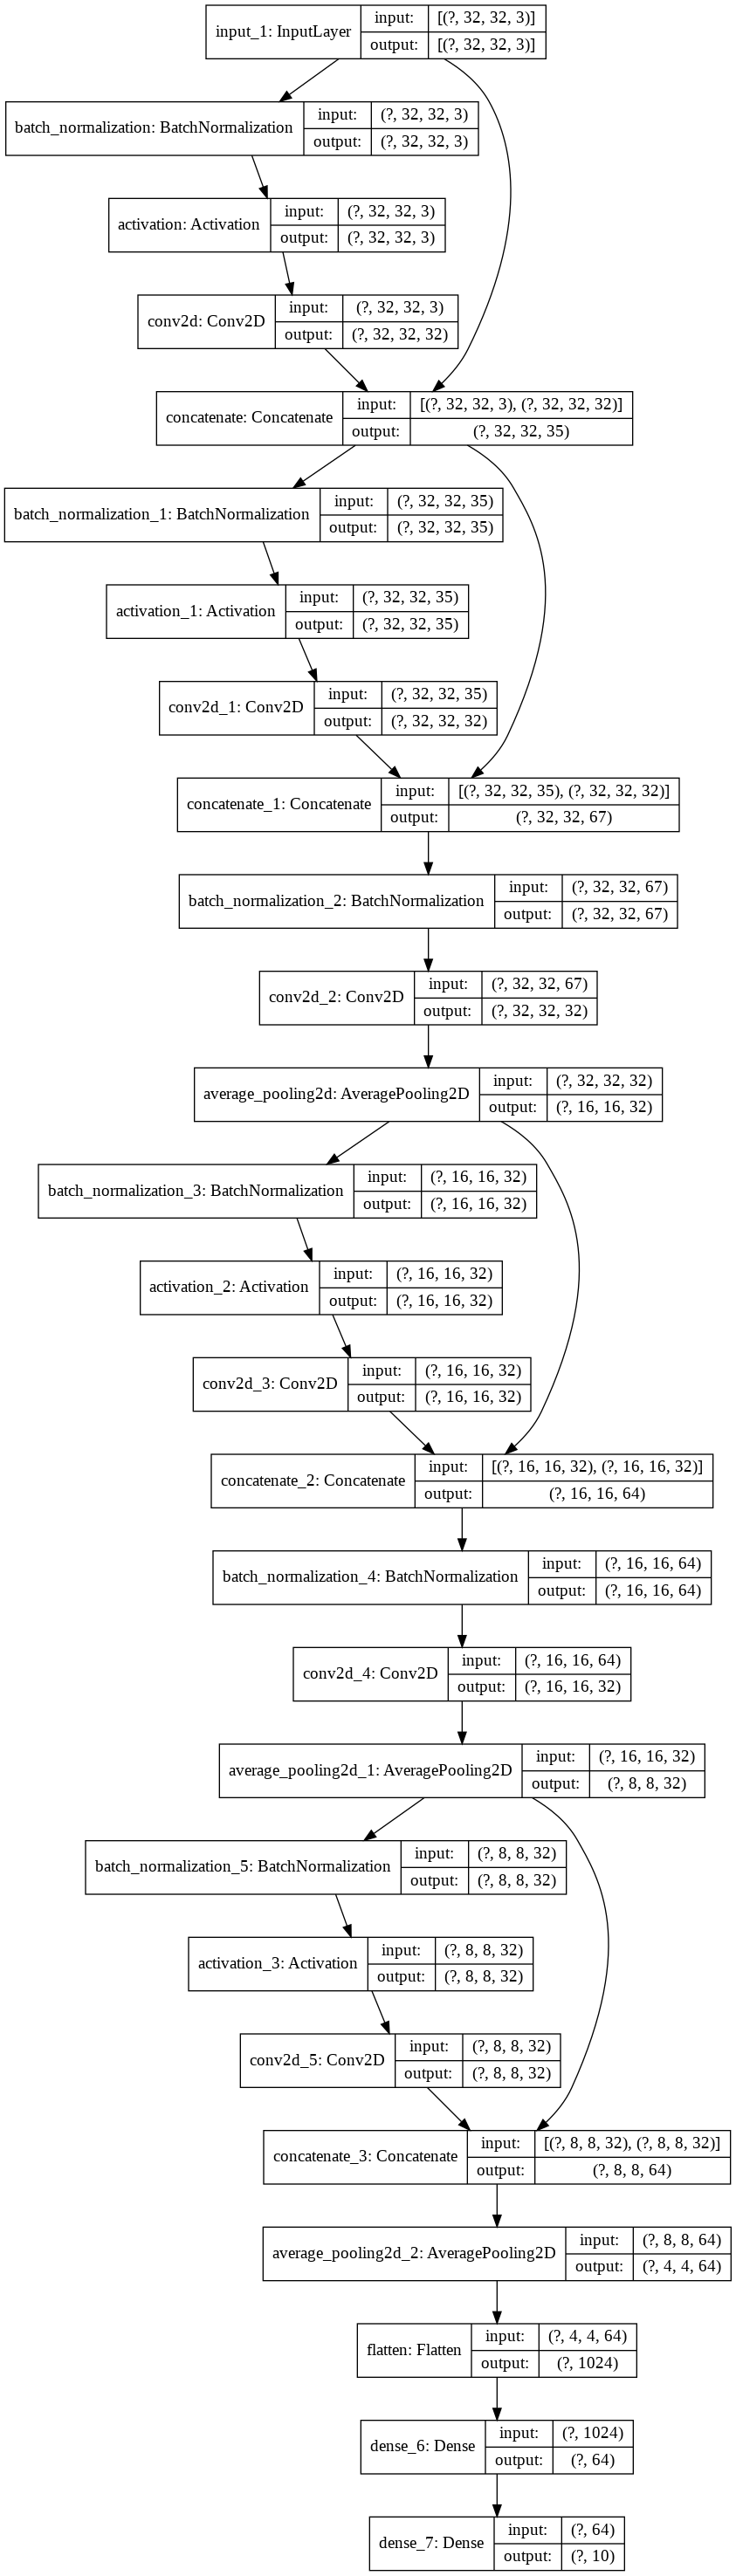

time: 438 ms


In [0]:
tf.keras.utils.plot_model(model, 'cifar10-densenet.png', show_shapes=True)

In [0]:
opt = tf.optimizers.Adam()

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.metrics.SparseCategoricalAccuracy()

# stereotypical train-step-with-function-annotation
@tf.function
def train_step(imgs, lbls):
    with tf.GradientTape() as tape:
        logits = model(imgs)
        xent = loss_fn(lbls, logits)

    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
    opt.apply_gradients(zip(grads, varis))

    return xent, logits

for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    xent, logits = train_step(img_batch, lbl_batch)

    if not step % 1000:
        train_acc_metric(lbl_batch, logits)
        acc = train_acc_metric.result()
        print("Loss: {} Accuracy: {}".format(xent, acc))
        train_acc_metric.reset_states()

Loss: 2.304373264312744 Accuracy: 0.1015625
Loss: 1.0876481533050537 Accuracy: 0.6015625
Loss: 0.7467686533927917 Accuracy: 0.7578125
Loss: 0.7975338697433472 Accuracy: 0.7578125
Loss: 0.6111396551132202 Accuracy: 0.8203125
Loss: 0.5226751565933228 Accuracy: 0.796875
time: 1min 23s


In [0]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test accuaracy: {}".format(test_acc_metric.result()))

Test accuaracy: 0.7103000283241272
time: 1.17 s
